# ディープラーニングによる画像分類 （CNN for CIFAR-10）&#x1f439;
## <font color='purple'>Google Colaboratory TPU 版</font>

### 担当教員： 長浜バイオ大学　和田 健之介

## TPU モードの設定

メニューより<br>
　　<strong>ランタイム  ⇒  ランタイムのタイプを変更</strong> <br>
 を選択して、現れたダイアログで<br>
- ランタイムのタイプ  = <font color='red'><strong>Python3</strong></font>
- ハードウェアアクセラレータ  = <font color='red'><strong>TPU</strong></font>
- このノートブックを保存する際にコードセルの出力を除外する = <font color='red'><strong>OFF</strong></font>

に設定してから【保存】ボタンを押す。

## Google Drive をマウント

### <font color='red'>注意</font>
`Google Drive` をマウントする際に<font color='red'><strong>認証コード</strong></font>を要求されたら、指定されたページから認証コードをコピーして貼り付けること！

参考：<br>
　　Google ドライブの使い方<br>
　　https://www.appsupport.jp/category/drive/

In [0]:
from google.colab import drive

drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
!ls -l /content/drive/'My Drive'/

total 28
drwx------ 2 root root 4096 Aug 26 09:45  Cats_vs_Dogs
drwx------ 2 root root 4096 Mar 28 02:22 'Colab Notebooks'
drwx------ 2 root root 4096 Aug 24 23:05  compare_deeplibs
drwx------ 2 root root 4096 Aug 23 06:45  model_weights_2019_08_23_15_45
drwx------ 2 root root 4096 Aug 26 16:22  model_weights_2019_08_27_01_22
drwx------ 2 root root 4096 Aug 26 16:29  model_weights_2019_08_27_01_29
drwx------ 2 root root 4096 Aug 26 16:31  model_weights_2019_08_27_01_31


## 計算開始時刻の記録

Google Colaboratory で実行する際に、日本時間の時刻を表示するためにはタイムゾーンの取得が必要となる。

In [0]:
import datetime
import pytz

start_time = datetime.datetime.now(pytz.timezone('Asia/Tokyo'))
print(start_time)

2019-08-27 01:35:22.307945+09:00


## TensorFlow 1.13.2 のインストール

`TensorFlow` <strong>1.14</strong> や <strong>2.0</strong> には、現時点（2019-08-20) では <strong>`fit_generator`</strong> が実装されていないため、`TensorFlow` を <strong>1.13.2</strong> にダウングレードする。

参考：<br>
　　https://qiita.com/koshian2/items/9d538c7082687a3fb802<br>
　　https://www.tensorflow.org/versions

In [0]:
!pip install tensorflow-gpu==1.13.2

     |████████████████████████████████| 345.0MB 41kB/s 
     |████████████████████████████████| 3.2MB 26.3MB/s 
     |████████████████████████████████| 368kB 47.6MB/s 
ERROR: tensorflow 1.14.0 has requirement tensorboard<1.15.0,>=1.14.0, but you'll have tensorboard 1.13.1 which is incompatible.
ERROR: tensorflow 1.14.0 has requirement tensorflow-estimator<1.15.0rc0,>=1.14.0rc0, but you'll have tensorflow-estimator 1.13.0 which is incompatible.
  Found existing installation: tensorboard 1.14.0
    Uninstalling tensorboard-1.14.0:
      Successfully uninstalled tensorboard-1.14.0
  Found existing installation: tensorflow-estimator 1.14.0
    Uninstalling tensorflow-estimator-1.14.0:
      Successfully uninstalled tensorflow-estimator-1.14.0


## TensorFlow と Keras のバージョンの確認

In [0]:
import tensorflow as tf
import keras

print("TensorFlow: ", tf.__version__)
print("Keras     : ", keras.__version__)

TensorFlow:  1.13.2
Keras     :  2.2.4


Using TensorFlow backend.


## Google Colaboratory の時間制限

`Google Colaboratory` では以下の条件のどちらか一方でも満たせば、実行中のプログラムがあってもインスタンスの状態がすべてリセットされる。
* 【90分ルール】　ノートブックの<font color='red'><strong>セッションが切れてから90分経過</strong></font>
* 【12時間ルール】新しいインスタンスを起動してから12時間経過

## Google Colaboratory の <font color='red'>９０分ルール</font> に対する対策

1. `Chrome` の拡張プラグインである `Auto Refresh` をインストールする。
2. 実行中のノートブックをリロードし、表示されたダイアログの  <strong>【キャンセル】</strong> ボタンを押す。
3. 再度、実行中のノートブックをリロードし、表示されたダイアログの <strong>【このページで追加のダイアログが作成されないようにする】</strong> にチェックを入れてから <strong>【再読み込み】</strong> のボタンを押す。
4. 実行中のノートブックで、`Auto Refresh` のアイコンをクリックして、例えば <strong>30 MIN</strong> に設定してから <strong>【Start】</strong> を押す。<br>
<strong>【activate colors】</strong>にチェックを入れておくと、残り時間により表示色が変化する。

もしくは、以下のバッチファイルを作成して起動する。<br>
ただし、`start` の右の `url` には、開いているノートブックの `url` をコピペしてしてから実行すること！

```
@echo off
setlocal ENABLEDELAYEDEXPANSION
	for /l %%i in (1, 1, 24) do (
	    echo [%%i] !date! !time!
	    timeout /t 1800
	    taskkill /F /IM chrome.exe /T > nul
	    timeout 3
	    start https://colab.research.google.com/drive/xxxxxxxxxxxxxxxxxxxxxxxxx
	)
endlocal
```


## Google Colaboratory の <font color='red'>１２時間ルール</font> に対する対策

起動してからの経過時間は以下のコマンドでチェックできるので、このコマンドを活用して残り時間があるうちに、モデルと重みを Google Drive 状に保存する。<br>
`!cat /proc/uptime | awk '{print "経過時間 : " ($1 / 3600) " hours (" $1 " sec)"}'`

訓練中のモデルと重みの保存・復元の方法については、以下のサイトが参考になる。<br>
　https://colab.research.google.com/github/tensorflow/docs/blob/master/site/ja/tutorials/keras/save_and_restore_models.ipynb

１２時間を超えるタスクを実行する方法：<br>
　https://qiita.com/tomo_makes/items/b3c60b10f7b25a0a5935

## CIFAR-10 (シーファーテン）
`10` のクラスにラベル付けされた `32 x 32` の大きさのカラー画像のデータセットで、 `50,000` 枚の<font color='red'>訓練用</font>画像と`10,000` 枚の<font color='red'>テスト用</font>画像とで構成されている。

参考:<br>
　https://keras.io/ja/datasets/<br>
　https://www.cs.toronto.edu/~kriz/cifar.html

## CIFAR-10 の正解ラベル名

In [0]:
labels_10 = [
    'airplane', 'automobile', 'bird', 'cat', 'deer',
    'dog', 'frog', 'horse', 'ship', 'truck'
]

## CIFAR-100 (シーファー・ハンドレッド）
`100` のクラスにラベル付けされた `32 x 32` の大きさのカラー画像のデータセットで、 `50,000` 枚の<font color='red'>訓練用</font>画像と`10,000` 枚の<font color='red'>テスト用</font>画像とで構成されている。

## CIFAR-100 の正解ラベル名を設定

参考：<br>
　　http://uchidama.hatenablog.com/entry/2018/01/22/064500

In [0]:
labels_100 = [
    'apple', 'aquarium_fish', 'baby', 'bear', 'beaver', 'bed', 'bee', 'beetle', 
    'bicycle', 'bottle', 'bowl', 'boy', 'bridge', 'bus', 'butterfly', 'camel', 
    'can', 'castle', 'caterpillar', 'cattle', 'chair', 'chimpanzee', 'clock', 
    'cloud', 'cockroach', 'couch', 'crab', 'crocodile', 'cup', 'dinosaur', 
    'dolphin', 'elephant', 'flatfish', 'forest', 'fox', 'girl', 'hamster', 
    'house', 'kangaroo', 'keyboard', 'lamp', 'lawn_mower', 'leopard', 'lion',
    'lizard', 'lobster', 'man', 'maple_tree', 'motorcycle', 'mountain', 'mouse',
    'mushroom', 'oak_tree', 'orange', 'orchid', 'otter', 'palm_tree', 'pear',
    'pickup_truck', 'pine_tree', 'plain', 'plate', 'poppy', 'porcupine',
    'possum', 'rabbit', 'raccoon', 'ray', 'road', 'rocket', 'rose',
    'sea', 'seal', 'shark', 'shrew', 'skunk', 'skyscraper', 'snail', 'snake',
    'spider', 'squirrel', 'streetcar', 'sunflower', 'sweet_pepper', 'table',
    'tank', 'telephone', 'television', 'tiger', 'tractor', 'train', 'trout',
    'tulip', 'turtle', 'wardrobe', 'whale', 'willow_tree', 'wolf', 'woman',
    'worm'
]

## ここでは CIFAR-10 のデータセットを使うことにする

In [0]:
labels = labels_10

### 損失が低く、精度が高いモデルにするためのヒントと<font color='red'>過学習</font>の予防策：
01. より深い層への改良<br>
　　https://keras.io/ja/getting-started/sequential-model-guide/
02. オプティマイザの変更<br>
　　https://keras.io/ja/optimizers/
03. より高度な活性化関数への変更<br>
　　https://keras.io/ja/layers/advanced-activations/
04. BatchNormalization の導入<br>
　　https://keras.io/ja/layers/normalization/#batchnormalization
05. Dropout を適宜追加<br>
　　https://keras.io/ja/layers/core/#dropout
06. データ標準化<br>
　　https://blog.amedama.jp/entry/2016/07/06/000918
07. L2正則化<br>
　　https://keras.io/ja/regularizers/
08. 重みの初期化関数の変更<br>
　　https://keras.io/ja/initializers/
09. データ拡張 (ImageDataGenerator)<br>
　　https://keras.io/ja/preprocessing/image/#imagedatagenerator_1
10. 学習率の自動調整<br>
　　LearningRateScheduler<br>
　　https://keras.io/ja/callbacks/#learningratescheduler<br>
　　ReduceLROnPlateau<br>
　　https://keras.io/ja/callbacks/#reducelronplateau

### 参考になる本家のサイト：
　https://keras.io/ja/

### サンプルプログラム：
　https://keras.io/examples/cifar10_cnn/<br>
　https://github.com/tensorflow/models/tree/master/research/resnet<br>
　https://appliedmachinelearning.blog/2018/03/24/achieving-90-accuracy-in-object-recognition-task-on-cifar-10-dataset-with-keras-convolutional-neural-networks/

### 各種モデルによる精度の比較：
　https://github.com/BIGBALLON/cifar-10-cnn<br>
　https://rodrigob.github.io/are_we_there_yet/build/classification_datasets_results.html#43494641522d3130<br>
　https://benchmarks.ai/cifar-10

## Google Colaboratory の経過時間 （最長：１２時間）

<font color='red'><strong>ランタイム ⇒ すべてのランタイムのリセット</strong></font> を実行すると経過時間がリセットされる。<br>
ただし、<strong>Google Drive への再接続</strong> が必要となる。

In [0]:
!cat /proc/uptime | awk '{print "経過時間 : " ($1 / 3600) " hours (" $1 " sec)"}'

経過時間 : 0.0565528 hours (203.59 sec)


## OS のバージョンの確認

In [0]:
!cat /etc/issue

Ubuntu 18.04.2 LTS \n \l



## CPU の確認

In [0]:
!cat /proc/cpuinfo | awk '{if ($1=="model" && $2=="name") print}'

model name	: Intel(R) Xeon(R) CPU @ 2.30GHz
model name	: Intel(R) Xeon(R) CPU @ 2.30GHz


## メモリの使用状況の確認

In [0]:
!free -h

              total        used        free      shared  buff/cache   available
Mem:            12G        633M        5.6G        844K        6.5G         11G
Swap:            0B          0B          0B


## ディスクの使用状況の確認

In [0]:
!df -h

Filesystem      Size  Used Avail Use% Mounted on
overlay          49G   28G   20G  59% /
tmpfs            64M     0   64M   0% /dev
tmpfs           6.4G     0  6.4G   0% /sys/fs/cgroup
tmpfs           6.4G  8.0K  6.4G   1% /var/colab
/dev/sda1        55G   29G   26G  53% /etc/hosts
shm             6.0G  4.0K  6.0G   1% /dev/shm
tmpfs           6.4G     0  6.4G   0% /proc/acpi
tmpfs           6.4G     0  6.4G   0% /proc/scsi
tmpfs           6.4G     0  6.4G   0% /sys/firmware
drive            15G   11G  4.7G  70% /content/drive


## 環境変数に登録されている TPU サーバーに接続
https://www.tensorflow.org/guide/distribute_strategy

In [0]:
import os
from tensorflow.contrib.tpu.python.tpu import keras_support

tpu_grpc_url         = "grpc://"+os.environ["COLAB_TPU_ADDR"]
tpu_cluster_resolver = tf.contrib.cluster_resolver.TPUClusterResolver(tpu_grpc_url)
strategy             = keras_support.TPUDistributionStrategy(tpu_cluster_resolver)

INFO:tensorflow:Querying Tensorflow master (grpc://10.11.47.26:8470) for TPU system metadata.
INFO:tensorflow:Found TPU system:
INFO:tensorflow:*** Num TPU Cores: 8
INFO:tensorflow:*** Num TPU Workers: 1
INFO:tensorflow:*** Num TPU Cores Per Worker: 8
INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:CPU:0, CPU, -1, 5088314225078111116)
INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:XLA_CPU:0, XLA_CPU, 17179869184, 11785794257180147240)
INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:0, TPU, 17179869184, 4627150004304981893)
INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:1, TPU, 17179869184, 6343854327532673435)
INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:2, TPU, 17179869184, 3391163506245752222)
INFO:tensorflow:*** Available Device: _DeviceAttributes(/j

## Numpy の乱数の種を設定

再実行後も train, validation, test の各データセットが同一となるために必要

In [0]:
import numpy as np

seed = 1234567
np.random.seed(seed=seed)

## CIFAR-10 のデータセットをロード

In [0]:
from tensorflow.keras.datasets import cifar10

(X_train, Y_train), (x_tests, y_tests) = cifar10.load_data()

170500096/170498071 [==============================] - 2s 0us/step


## 学習に使用するデータセットの割合を設定

In [0]:
# データセットの最初の rate (0～1) の割合だけ使用
rate = 1.0

num_train = round(X_train.shape[0] * rate)
num_tests = round(x_tests.shape[0] * rate)

arange_train = np.arange(X_train.shape[0])
select_train = np.random.choice(arange_train, num_train, replace=False) # 重複なし

arange_tests = np.arange(x_tests.shape[0])
select_tests = np.random.choice(arange_tests, num_tests, replace=False) # 重複なし

X_train = X_train[select_train]
Y_train = Y_train[select_train]

x_tests = x_tests[select_tests]
y_tests = y_tests[select_tests]

## CIFAR-10 の画像を 100枚だけ表示

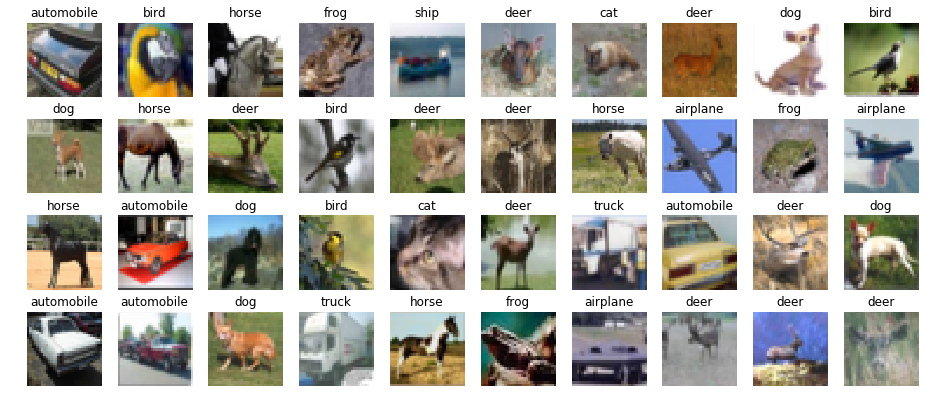

In [0]:
import random
import matplotlib.pyplot as plt
%matplotlib inline

start = random.randint(0, x_tests.shape[0] / 2)
plt.figure(figsize=(16, 6))
plt.subplots_adjust(wspace=0.2, hspace=0.3, top=0.85, bottom=0.01)

for idx, img in enumerate(x_tests[start:(start+40)]):
    plt.subplot(4, 10, (idx + 1))
    plt.imshow(img)
    plt.axis('off')
    plt.title(labels[y_tests[start + idx][0]])

plt.show()

## 正解ラベルを One-hot 表現に変換

In [0]:
from tensorflow.keras.utils import to_categorical

num_classes = 10

Y_train = to_categorical(Y_train, num_classes)
y_tests = to_categorical(y_tests, num_classes)

## データの標準化 or 正規化

In [0]:
# 最後にテスト用画像を描画して、視覚的に確認するために、標準化前のオリジナルの画像データをコピーしておく
X_tests = np.copy(x_tests)

isStandardization = True

if isStandardization:
    X_train = X_train.astype('float32')
    x_tests = x_tests.astype('float32')
    X_train = (X_train - np.mean(X_train)) / np.std(X_train)
    x_tests = (x_tests - np.mean(x_tests)) / np.std(x_tests)
else:
    X_train = X_train.astype('float32') / 255.0
    x_tests = x_tests.astype('float32') / 255.0

## 上記でロードした train のデータを訓練 (Training) 用と検証 (Validation) 用とに分割

### <font color='red'>最重要な注意事項！</font>
1. <strong>テスト用のデータ `(x_test, y_test)` は、最終評価 `evaluation` まで一切使用しないこと !!</strong>
2. <strong>データ拡張は、訓練用のデータ `(x_train, y_tain)` に対してだけ適用</strong>し、検証用のデータ `(x_valid, y_valid)` には適用しないこと！
3. 分離に使用する<strong>関数名 <font color='blue'>`train_test_split`</font> の名前に惑わされない</strong>こと！この関数は単に指定された割合で２種類に区分するだけである。
4. 学習を `fit` で行う場合は、`validation_split` のパラメータを使って訓練用と検証用とに手軽に分割できるが、データ拡張などで `fit_generator` を使って学習させる場合には、このパラメータが使えないので、<strong>この段階で分割しておくことで無駄な混乱を避ける</strong>ことができる。

慣れないうちは、
# <font color='orange'>まぜるな危険！</font>　<font color='magenta'>訓練・検証・テスト！</font>
の<strong>合言葉</strong>を何度も何度も復唱し、脳というより身体に叩き込むこと！

In [0]:
from sklearn.model_selection import train_test_split

# 訓練用データの割合
train_size = 0.9

# 乱数の種
random_state = 20190707

x_train, x_valid, y_train, y_valid = train_test_split(X_train, Y_train, train_size=train_size, random_state=random_state)

print("x_train.shape = ", x_train.shape)
print("y_train.shape = ", y_train.shape)
print("x_valid.shape = ", x_valid.shape)
print("y_valid.shape = ", y_valid.shape)
print("x_tests.shape = ", x_tests.shape)
print("y_tests.shape = ", y_tests.shape)

x_train.shape =  (45000, 32, 32, 3)
y_train.shape =  (45000, 10)
x_valid.shape =  (5000, 32, 32, 3)
y_valid.shape =  (5000, 10)
x_tests.shape =  (10000, 32, 32, 3)
y_tests.shape =  (10000, 10)


## モデルの構築

### `Sequential モデル`
　https://keras.io/ja/getting-started/sequential-model-guide/
 
### `Conv2D`
　https://keras.io/ja/layers/convolutional/#conv2d
  - `kernel_initializer`<br>
　https://keras.io/ja/initializers/#he_normal
  - `kernel_regularizer`<br>
　https://keras.io/ja/regularizers/#_2

### `Activation`
　https://keras.io/ja/activations/

### `BatchNormalization`
　https://keras.io/ja/layers/normalization/#batchnormalization
 
### `MaxPooling2D`
　https://keras.io/ja/layers/pooling/#maxpooling2d

### `Dropout`
　https://keras.io/ja/layers/core/#dropout

### `Flatten`
　https://keras.io/ja/layers/core/#flatten

### `Dense`
　https://keras.io/ja/layers/core/#dense

### `GlobalAveragePooling2D`
　https://keras.io/ja/layers/pooling/#globalaveragepooling2d

## <font color='red'>注意</font>

<strong>TensorFlow 1.13.2 ＋ Keras 2.2.4</strong> の場合、<strong>InputLayer</strong> を使ってモデルを構築すると、<strong>isLoading = True</strong> のときに入力サイズに関するエラーが発生するため、<strong>Conv2D</strong> のパラメータ、<strong>input_shape</strong> で入力の形状を指定すること！

In [0]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Activation, BatchNormalization
from tensorflow.keras.layers import MaxPooling2D, Dropout, Flatten, Dense
from tensorflow.keras import regularizers

def model_add_Conv2D_Activ_BatchNorm(model, isFirst, conv_param, padding, regularizer, activation):
    filters, kenel_size = conv_param
    if isFirst:
        model.add(Conv2D(filters, kenel_size, padding=padding, kernel_regularizer=regularizer, input_shape=x_train.shape[1:]))
    else:
        model.add(Conv2D(filters, kenel_size, padding=padding, kernel_regularizer=regularizer))
    model.add(Activation(activation))
    model.add(BatchNormalization())

def create_model(conv_params, fc_params, padding, regularizer, activation, dropout_1, dropout_2, dropout_3):
    model = Sequential()
    
    isFirst = True
    for conv_param in conv_params:
        if conv_param == 'm':
            model.add(MaxPooling2D())
        elif conv_param == 'd':
            model.add(Dropout(dropout_1))
        else:
            model_add_Conv2D_Activ_BatchNorm(model, isFirst, conv_param, padding, regularizer, activation)
            isFirst = False
    
    #-------- FC (fully Connected) Block ------
    model.add(Flatten())
    
    for fc_param in fc_params:
        if fc_param == 'd':
            model.add(Dropout(dropout_2))
        elif fc_param == 'b':
            model.add(BatchNormalization())
        else:    
            model.add(Dense(fc_param, kernel_regularizer=regularizer))
            model.add(Activation(activation))
        
    model.add(Dropout(dropout_3))
    
    model.add(Dense(y_train.shape[1]))
    model.add(Activation('softmax'))
    
    return model

## 学習済みのモデルからモデルをロード、もしくは新規にモデルを構築

モデルをロードしたい場合は、<font color='red'><strong>`isLoading = True`</strong></font> に変更した後、モデルと重みを保存したディレクトリの名前 <font color='red'><strong>`datetime`</strong></font> を修正する。

In [0]:
import os

# 学習済みモデルが存在し、モデルをロードする場合には True に変更する
isLoading = False

if isLoading:
    # モデルと重みを保存するディレクトリ名を、学習時の日時を最後に付けて作成
    myDrive  = "/content/drive/My Drive"
    datetime = '2019_08_22_19_01'
    model_weights_dir = os.path.join(myDrive, 'model_weights_' + datetime)
    
    if (os.path.exists(model_weights_dir) and os.path.isdir(model_weights_dir)):
        # モデルと重みのファイル名
        model_filename   = os.path.join(model_weights_dir, 'cnn_for_cifar10_model.json')        
        weights_filename = os.path.join(model_weights_dir, 'cnn_for_cifar10_weights.hdf5')
        
        if os.path.exists(model_filename) and os.path.isfile(model_filename):
            print("Loading a model file...")
            model = tf.keras.models.load_model(model_filename)
            isLoading = True
        else:
            isLoading = False
            print(model_filename + " is not Found.")
    else:
        isLoading = False
        print(model_weights_dir + " is not Found.")

if not isLoading:
    print("Cretating a model...")
    
    # conv_params の各要素は次の３種類のうちのいずれか
    # (filters, kernel_size) のときは、Conv2D のフィルタ数とカーネルサイズ
    # 'm' のときは、MaxPooling2D()
    # 'd' のときは、Dropout(dropout_1)
    
    conv_params = [
                   (  64, 3), 'd', (  64, 3), 'd', (  64, 3), 'd',
                   ( 128, 3), 'd', ( 128, 3), 'd', ( 128, 3), 'd',
                   ( 256, 3), 'd', ( 256, 3), 'd', ( 256, 3), 'm', 'd',
                   ( 512, 3), 'd', ( 512, 3), 'd', ( 512, 3), 'm', 'd',
                   (1024, 3), 'd', (1024, 3), 'd', (1024, 3), 'm', 'd',
                  ]
    
    # fc_params の各要素は次の３種類のうちのいずれか
    # 数字のときは、Dense のニューロン数
    # 'b' のときは、BatchNormaliztion()
    # 'd' のときは、Dropout(dropout_2)
    fc_params   = [1024, 'b', 'd', 512, 'b', 'd', 256, 'b', 'd', 128, 'b']
    
    padding     = 'same'                         # パディングするとき 'same'、しないとき 'valid'
    regularizer = regularizers.l2(0.00003)       # L1正則化 (l1)、L2正則化 (l2)、L1-L2正則化 (l1_l2)
    activation  = 'elu'                          # 活性化関数：Sigmoid, ReLU, ELU, LeakyReLU など
    dropout_1   = 0.2                            # Conv2D ブロックのドロップアウト率
    dropout_2   = 0.2                            # Fully-Connected ブロックの中間層のドロップアウト率
    dropout_3   = 0.5                            # Fully-Connected ブロックの最終層のドロップアウト率
    
    model = create_model(
                    conv_params,
                    fc_params,
                    padding,
                    regularizer,
                    activation,
                    dropout_1,
                    dropout_2,
                    dropout_3
    )

Cretating a model...
Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


## モデルの概要を表示

In [0]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 64)        1792      
_________________________________________________________________
activation (Activation)      (None, 32, 32, 64)        0         
_________________________________________________________________
batch_normalization_v1 (Batc (None, 32, 32, 64)        256       
_________________________________________________________________
dropout (Dropout)            (None, 32, 32, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 64)        36928     
_________________________________________________________________
activation_1 (Activation)    (None, 32, 32, 64)        0         
_________________________________________________________________
batch_normalization_v1_1 (Ba (None, 32, 32, 64)        256       
__________

## モデルのコンパイル

### `compile`
　https://keras.io/ja/models/model/#compile
　
- `loss`<br>
　https://keras.io/ja/losses/<br>
  - mean_squared_error : 二乗誤差
  - mean_absolute_error : 絶対値誤差
  - mean_absolute_percentage_error, make : 正解とのズレ(絶対値)の割合
  - mean_squared_logarithmic_error, msle : 正解とのズレ(二乗誤差)の割合
  - squared_hinge : マイナスのところは 0, プラスは二乗誤差
  - hinge : マイナスのところは 0, プラスは絶対値
  - categorical_hinge: 多クラス分類用の hinge
  - logcosh: 予測誤差のハイパボリックコサインの対
  - binary_crossentropy : ２値分類 logloss
  - <font color='red'>categorical_crossentropy</font> : 多クラス分類 logloss
  - sparse_categorical_crossentropy : スパースラベルを取る categorical_crossentropy
  - kullback_leibler_divergence, kld : 分布の距離（的なもの）
  - poisson : 予測 - 正解 * log(予測) の平均
  - cosine_proximity : 予測と正解間のコサイン近似の負の平均<br>
　
- `optimizer`<br>
　https://keras.io/ja/optimizers/<br>
  - SGD: 確率的勾配降下法オプティマイザ
  - AdaGrad (2011): 多次元問題だと勾配が緩やかな方向には収束に時間がかかるため、各次元ごとに学習率を調整していくこうという手法
  - RMSprop (2012): 学習率が0に近くなった次元についても更新されるように改善したオプティマイザ．リカレントＮＮに対して良い選択となる
  - AdaDelta (2012): RMSprop における次元数のミスマッチ問題を解消したオプティマイザ
  - <font color='red'>Adam</font> (2015): RMSProp と momumtum を組み合わせたオプティマイザ
  - <font color='red'>AdaMax</font> (2015): 無限ノルムに基づくAdamの拡張
  - <font color='red'>Nadam</font> (2016): RMSProp と Nesterov momentum を組み合わせたオプティマイザ
  - TFOptimizer: TensorFlow のオプティマイザのためのラッパークラス<br>
　
- `metrics`<br>
　https://keras.io/ja/metrics/

In [0]:
model.compile(
        loss='categorical_crossentropy',
        optimizer="nadam",
        metrics=['accuracy'])

## Keras の model を TPU 用のモデルに変換

In [0]:
model = tf.contrib.tpu.keras_to_tpu_model(model, strategy=strategy)

INFO:tensorflow:Cloning Nadam {'lr': 0.0020000000949949026, 'beta_1': 0.8999999761581421, 'beta_2': 0.9990000128746033, 'epsilon': 1e-07, 'schedule_decay': 0.004}
INFO:tensorflow:Cloning Nadam {'lr': 0.0020000000949949026, 'beta_1': 0.8999999761581421, 'beta_2': 0.9990000128746033, 'epsilon': 1e-07, 'schedule_decay': 0.004}


## 学習済みのモデルを使う場合、重みのデータをロード

In [0]:
if isLoading and os.path.exists(weights_filename) and os.path.isfile(weights_filename):
    print("Loading a weights file...")
    model.load_weights(weights_filename)

## データ拡張 (Data Augmentation)

### `ImageDataGenerator`
　https://keras.io/ja/preprocessing/image/#imagedatagenerator_1<br>
　https://keras.io/ja/preprocessing/image/#flow<br>


### `flow`
　https://keras.io/ja/preprocessing/image/#flow

In [0]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
                rotation_range      = 20,   # ランダムに回転する回転範囲（単位は角度）
                zoom_range          = 0.2,  # ランダムにズームする範囲 [lower, upper] = [1-zoom_range, 1+zoom_range]
                width_shift_range   = 0.2,  # ランダムに水平シフトする範囲 (横幅に対する割合)
                height_shift_range  = 0.2,  # ランダムに垂直シフトする範囲 (縦幅に対する割合)
                channel_shift_range = 0.2,  # ランダムにチャネルシフトする範囲
                horizontal_flip     = True  # ランダムに水平反転
)

train_datagen.fit(X_train)                  # 白色化 (zca_whitening) などを行う場合は必要となる

## 学習率の自動調整

### `LearningRateScheduler`
　https://keras.io/ja/callbacks/#learningratescheduler

　https://blog.shikoan.com/keras-learning-rate-decay/<br>
　https://machinelearningmastery.com/using-learning-rate-schedules-deep-learning-models-python-keras/<br>

### `学習率のデフォルト値`
- Adam　の学習率のデフォルト値は、lr = `0.001`<br>
　https://keras.io/ja/optimizers/#adam
- Nadam の学習率のデフォルト値は、lr = `0.002`<br>
　https://keras.io/ja/optimizers/#nadam

### <font color='red'>注意：</font>
　　`isLoading = True` で学習済みのモデルをロードして継続学習する場合は、`initial_lrate` の値を小さな値に設定する。

In [0]:
from tensorflow.keras.callbacks import LearningRateScheduler

def step_decay(epoch):
    if isLoading:
        initial_lrate = 0.0001
        drop          = 0.9
    else:
        initial_lrate = 0.001
        drop          = 0.85
    epochs_drop   = 10
    min_lr        = 1.0e-6
    
    lrate = initial_lrate * np.power(drop, np.floor(epoch / epochs_drop))
    if lrate < min_lr:
        lrate = min_lr
    
    return lrate

learning_rate_step_decay = LearningRateScheduler(step_decay, verbose=1)

### `ReduceLROnPlateau`

　https://keras.io/ja/callbacks/#reducelronplateau

```
ReduceLROnPlateau(
　　　　monitor='val_loss',　　# 監視する値
　　　　factor=0.1,　　　　　  # 学習率を減らす割合．new_lr = lr * factor
　　　　patience=10,　　　　　 # 何エポック改善が見られなかったら学習率の削減を行うか．
　　　　verbose=0,　　　　　　 # 整数．0 = 何も表示しない．1 = 学習率削減時メッセージを表示．
　　　　mode='auto',　　　　　 # auto，min，maxのいずれか．
　　　　　　　　　　　　　　　 # max  の場合，監視する値の増加が停止した時に，学習率を更新する．
　　　　　　　　　　　　　　　 # auto の場合，監視する値の名前から自動で判断する．
　　　　epsilon=0.0001,　　　　# 改善があったと判断する閾値．有意な変化だけに注目するために用いる．
　　　　cooldown=0,　　　　　　# 学習率を減らした後，通常の学習を再開するまで待機するエポック数．
　　　　min_lr=0 　　　　　　　# 学習率の下限．
)
```

### <font color='red'>注意</font>

<strong>TensorFlow 1.13.2 ＋ Keras 2.2.4</strong> の場合、<strong>ReduceLROnPlateau</strong> を使うとエラーが発生する。

In [0]:
from tensorflow.keras.callbacks import ReduceLROnPlateau

learning_rate_reduce_on_plateau = ReduceLROnPlateau(
                                        monitor='val_acc',
                                        factor=0.8,
                                        patience=4,
                                        verbose=1,
                                        min_lr=0.000001)

## モデルと重みを保存するための関数

参考：<br>
　　https://www.tensorflow.org/beta/guide/keras/saving_and_serializing<br>
　　https://qiita.com/supersaiakujin/items/b9c9da9497c2163d5a74<br>
　　https://qiita.com/ak11/items/67118e11b756b0ee83a5

In [0]:
import datetime
import pytz
import os
from google.colab import drive

def save_model_weights():
    global model
    
    now = datetime.datetime.now(pytz.timezone('Asia/Tokyo'))

    # 時刻より文字列を生成
    time_str = "{}_{:02d}_{:02d}_{:02d}_{:02d}".format(
        now.year, now.month, now.day, now.hour, now.minute)

    # モデルと重みを保存するディレクトリ名を生成
    myDrive = "/content/drive/My Drive"
    model_weights_dir = os.path.join(myDrive, 'model_weights_' + time_str)

    print("model_weights_dir =", model_weights_dir)

    if not (os.path.exists(model_weights_dir) and os.path.isdir(model_weights_dir)):
        os.mkdir(model_weights_dir)
    
    print("Please wait for a few minutes.")
    
    # モデルを保存
    model_filename = os.path.join(model_weights_dir, 'cnn_for_cifar10_model.json')
    model.save(model_filename)
    
    # 重みを保存
    weights_filename = os.path.join(model_weights_dir, 'cnn_for_cifar10_weights.hdf5')
    model.save_weights(weights_filename)

    print("Saved a model in " + model_weights_dir)

## Warnings の抑制

In [0]:
import warnings
warnings.filterwarnings('ignore')

import tensorflow as tf
tf.logging.set_verbosity(tf.logging.ERROR)

## 学習の実行

参考：<br>
　　https://keras.io/ja/models/model/#fit_generator

### `fit_generator`
- `epochs`<br>
　　モデルを訓練するエポック数．エポック数は，一つの訓練用データ全体を繰り返し学習させる回数．<br>
- `steps_per_epoch`<br>
　　ある一つのエポックが終了し，次のエポックが始まる前に訓練用ジェネレータが使用する総ステップ数．<br>
　　通常は、訓練用データのサイズをバッチサイズで割った数を設定する．<br>
　　指定されていない場合は，len(generator) を使用する．<br>
- `validation_steps`<br>
　　validation_data がジェネレータの場合にのみ関係する．<br>
　　各エポックが終了する前に検証用のジェネレータが使用する総ステップ数．<br>
　　通常は、検証用データのサイズをバッチサイズで割った数を設定する．
- `verbose`<br>
　　`0`=標準出力にログを出力しない、`1`=ログをプログレスバーで出力，`2`=エポックごとに1行のログを出力

## batch_size
　　<strong>TPU</strong> で計算する場合、<strong>バッチサイズ</strong> は <strong>`num_cores`（TPU のコア数）</strong>の数である<font color='red'><strong>８</strong></font>で割り切れなければならない。<br>
　　1 個の Cloud TPU デバイスは、4 個の TPU チップと 8 個のコア（TPU チップあたり 2 個のコア）で構成されている。<br>
　　<font color='red'><strong>バッチサイズが小さいと計算が遅くなるが、大きすぎると精度が低下する。</strong></font>  <font size=6>&#x1f4a9;</font><br>
　　**参考**<br>
　　https://cloud.google.com/tpu/docs/quota?authuser=1&hl=ja

In [0]:
import time
import sys

num_cores        = 8
batch_size       = 64
batch_size       = (batch_size // num_cores) * num_cores

aug_ratio        = 10000
steps_per_epoch  = (x_train.shape[0] // batch_size) * aug_ratio

print("x_train         =", x_train.shape[0])
print("batch_size      =", batch_size)
print("aug_ratio       =", aug_ratio)
print("steps_per_epoch =", steps_per_epoch)

train_generator = train_datagen.flow(x_train, y_train, batch_size=batch_size)

start = time.time()

if isLoading:
    epochs = 300
else:
    epochs = 600

try:
    history = model.fit_generator(
                train_generator,
                epochs=epochs,
                steps_per_epoch=steps_per_epoch,
                validation_data=(x_valid, y_valid),
                verbose=2,
                callbacks=[learning_rate_step_decay])
except KeyboardInterrupt:
    print("\nSaving a model and weight by Exception.")
    save_model_weights()
    sys.exit(1)
except Exception  as e:
    print("\n例外 args:", e.args)
    sys.exit(1)

elapsed_time = time.time() - start
print("Elapsed Time [CNN Loop]: {}".format(elapsed_time) + " [sec]")

x_train         = 45000
batch_size      = 64
aug_ratio       = 10000
steps_per_epoch = 7030000

Epoch 00001: LearningRateScheduler reducing learning rate to 0.001.
Epoch 1/600
5000/5000 [==============================] - 41s 8ms/sample - loss: 2.5799 - acc: 0.1880
 - 206s - loss: 2.5439 - acc: 0.2239 - val_loss: 2.5826 - val_acc: 0.1880

Epoch 00002: LearningRateScheduler reducing learning rate to 0.001.
Epoch 2/600
5000/5000 [==============================] - 2s 433us/sample - loss: 2.2080 - acc: 0.3914
 - 42s - loss: 1.9498 - acc: 0.3478 - val_loss: 2.2164 - val_acc: 0.3914

Epoch 00003: LearningRateScheduler reducing learning rate to 0.001.
Epoch 3/600
5000/5000 [==============================] - 2s 436us/sample - loss: 2.8430 - acc: 0.4048
 - 42s - loss: 1.7194 - acc: 0.4233 - val_loss: 2.8511 - val_acc: 0.4048

Epoch 00004: LearningRateScheduler reducing learning rate to 0.001.
Epoch 4/600
5000/5000 [==============================] - 2s 446us/sample - loss: 1.3491 - acc: 0.5798
 -

## 学習の履歴をグラフ表示

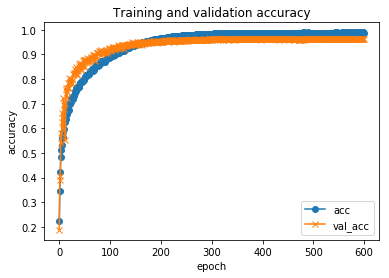

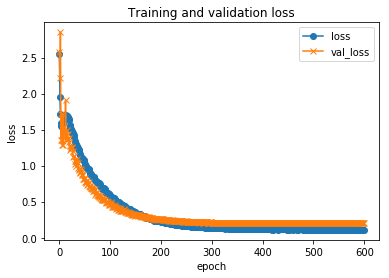

In [0]:
import matplotlib.pyplot as plt
%matplotlib inline

# acc、val_acc のプロット
plt.figure()
plt.plot(history.history["acc"], label="acc", ls="-", marker="o")
plt.plot(history.history["val_acc"], label="val_acc", ls="-", marker="x")
plt.ylabel("accuracy")
plt.xlabel("epoch")
plt.title("Training and validation accuracy")
plt.legend(loc="lower right")

# loss, val_loss のプロット
plt.figure()
plt.plot(history.history["loss"], label="loss", ls="-", marker="o")
plt.plot(history.history["val_loss"], label="val_loss", ls="-", marker="x")
plt.ylabel("loss")
plt.xlabel("epoch")
plt.title("Training and validation loss")
plt.legend(loc="upper right")

plt.show()

## <font color='red'>テスト用データを使った最終評価</font>

https://keras.io/ja/models/model/#evaluate

In [0]:
loss, score = model.evaluate(x_tests, y_tests, verbose=0)

print('Test loss    :', loss)
print('Test accuracy:', score)

Test loss    : 0.21184543086290358
Test accuracy: 0.9601


## テスト用データの先頭の８枚を可視化

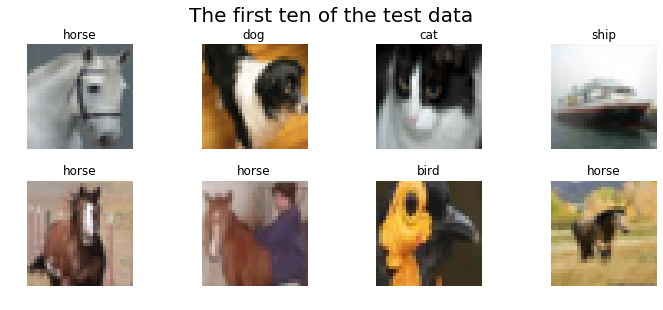

In [0]:
fig = plt.figure(figsize=(12, 4))
plt.subplots_adjust(wspace=0.2, hspace=0.3, top=0.85, bottom=0.01)

for i in range(8):
    plt.subplot(2, 4, i+1)
    plt.imshow(X_tests[i])
    plt.axis('off')
    answer = np.argmax(y_tests[i])
    plt.title(labels[answer])

plt.suptitle("The first ten of the test data", fontsize=20)
plt.show()

## テストデータの先頭の８枚の予測結果と正解ラベルを表示

In [0]:
print("予測：")
pred = np.argmax(model.predict(x_tests[:8]), axis=1)
s = ""
for i in range(8):
    s += "{:12s}".format(labels[pred[i]])
print(s)

print("\n正解：")
answer = np.argmax(y_tests[:8], axis=1)
s = ""
for i in range(8):
    s += "{:12s}".format(labels[answer[i]])
print(s)

予測：
horse       dog         cat         ship        horse       horse       bird        horse       

正解：
horse       dog         cat         ship        horse       horse       bird        horse       


## 学習結果を保存

In [0]:
!ls -l /content/drive/'My Drive'/

total 28
drwx------ 2 root root 4096 Aug 26 09:45  Cats_vs_Dogs
drwx------ 2 root root 4096 Mar 28 02:22 'Colab Notebooks'
drwx------ 2 root root 4096 Aug 24 23:05  compare_deeplibs
drwx------ 2 root root 4096 Aug 23 06:45  model_weights_2019_08_23_15_45
drwx------ 2 root root 4096 Aug 26 16:22  model_weights_2019_08_27_01_22
drwx------ 2 root root 4096 Aug 26 16:29  model_weights_2019_08_27_01_29
drwx------ 2 root root 4096 Aug 26 16:31  model_weights_2019_08_27_01_31


In [0]:
save_model_weights()

model_weights_dir = /content/drive/My Drive/model_weights_2019_08_27_08_48
Please wait for a few minutes.
Saved a model in /content/drive/My Drive/model_weights_2019_08_27_08_48


## 経過時間を表示

In [0]:
end_time = datetime.datetime.now(pytz.timezone('Asia/Tokyo'))
print("\nStart   Time  : " + str(start_time))
print(  "End     Time  : " + str(end_time))
print(  "Elapsed Time  : " + str(end_time - start_time))


Start   Time  : 2019-08-27 01:35:22.307945+09:00
End     Time  : 2019-08-27 08:50:24.452583+09:00
Elapsed Time  : 7:15:02.144638


In [0]:
!cat /proc/uptime | awk '{print "経過時間 : " ($1 / 3600) " hours (" $1 " sec)"}'

経過時間 : 7.2849 hours (26225.64 sec)


## <font color='red'>典型的なエラーとその対処法</font>

1. スペルミスなどの初歩的なミスについては、エラーが表示された行を注意深くチェックする。<br>
行番号はメニューの<strong> `View` ⇒ `Toggle Line Numbers` </strong>を選択すると表示されるようになる。
2. 長いエラーメッセージの最後のほうに、<br>
<strong>`This is probably because cuDNN failed to initialize, ...`</strong><br>
といったメッセージが現れた場合、前に実行した Jupyter Notebook が GPU のリソースを解放していないケースが多い。<br>
前に実行したノートブック上で、メニューから <strong> `Kernel` ⇒ `Shutdown` </strong>を選択してカーネルを落とすか、<br>
ノートブックを開いたときに自動的に起動したコマンドプロンプトを、<br>
右上の赤いバツ印ボタンを何回か押して強制的に閉じてから、<br>
再度、startJupyter.bat をダブルクリックし、動かしたいノートブックを選択してから<strong> `Cell` ⇒ `Run All`</strong> で実行する。
3. 長いエラーメッセージの最後のほうに、<br>
<strong>`ResourceExhaustedError`</strong><br>
といった文字が現れた場合、起動時に自動的に開かれたコマンドプロンプトをチェックし、<br>
<strong>`ran out of memory trying to allocate ...`</strong><br>
といった、ＧＰＵのメモリー不足によるエラー <strong>`OOM  (Out Of Memory)`</strong>が表示されているときは、<br>
    - `batch_size` の値を半分に減らして再度試してみる。
    - `ImageDataGenerator` を使っていない場合は、この関数を使って `batch_size` ずつ逐次的にデータを処理できるように変更する。
    - モデルの構成をより小規模にする。
    - より多くのビデオメモリを搭載したＧＰＵにアップグレードする。<br>
<font color='red'>ただし、必要な電源容量、電源コネクタの種類と数、物理的なサイズ、などの条件を事前に調べること！</font>